In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [ ]:
df = pd.read_csv("/content/Fertilizer Prediction.csv")

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

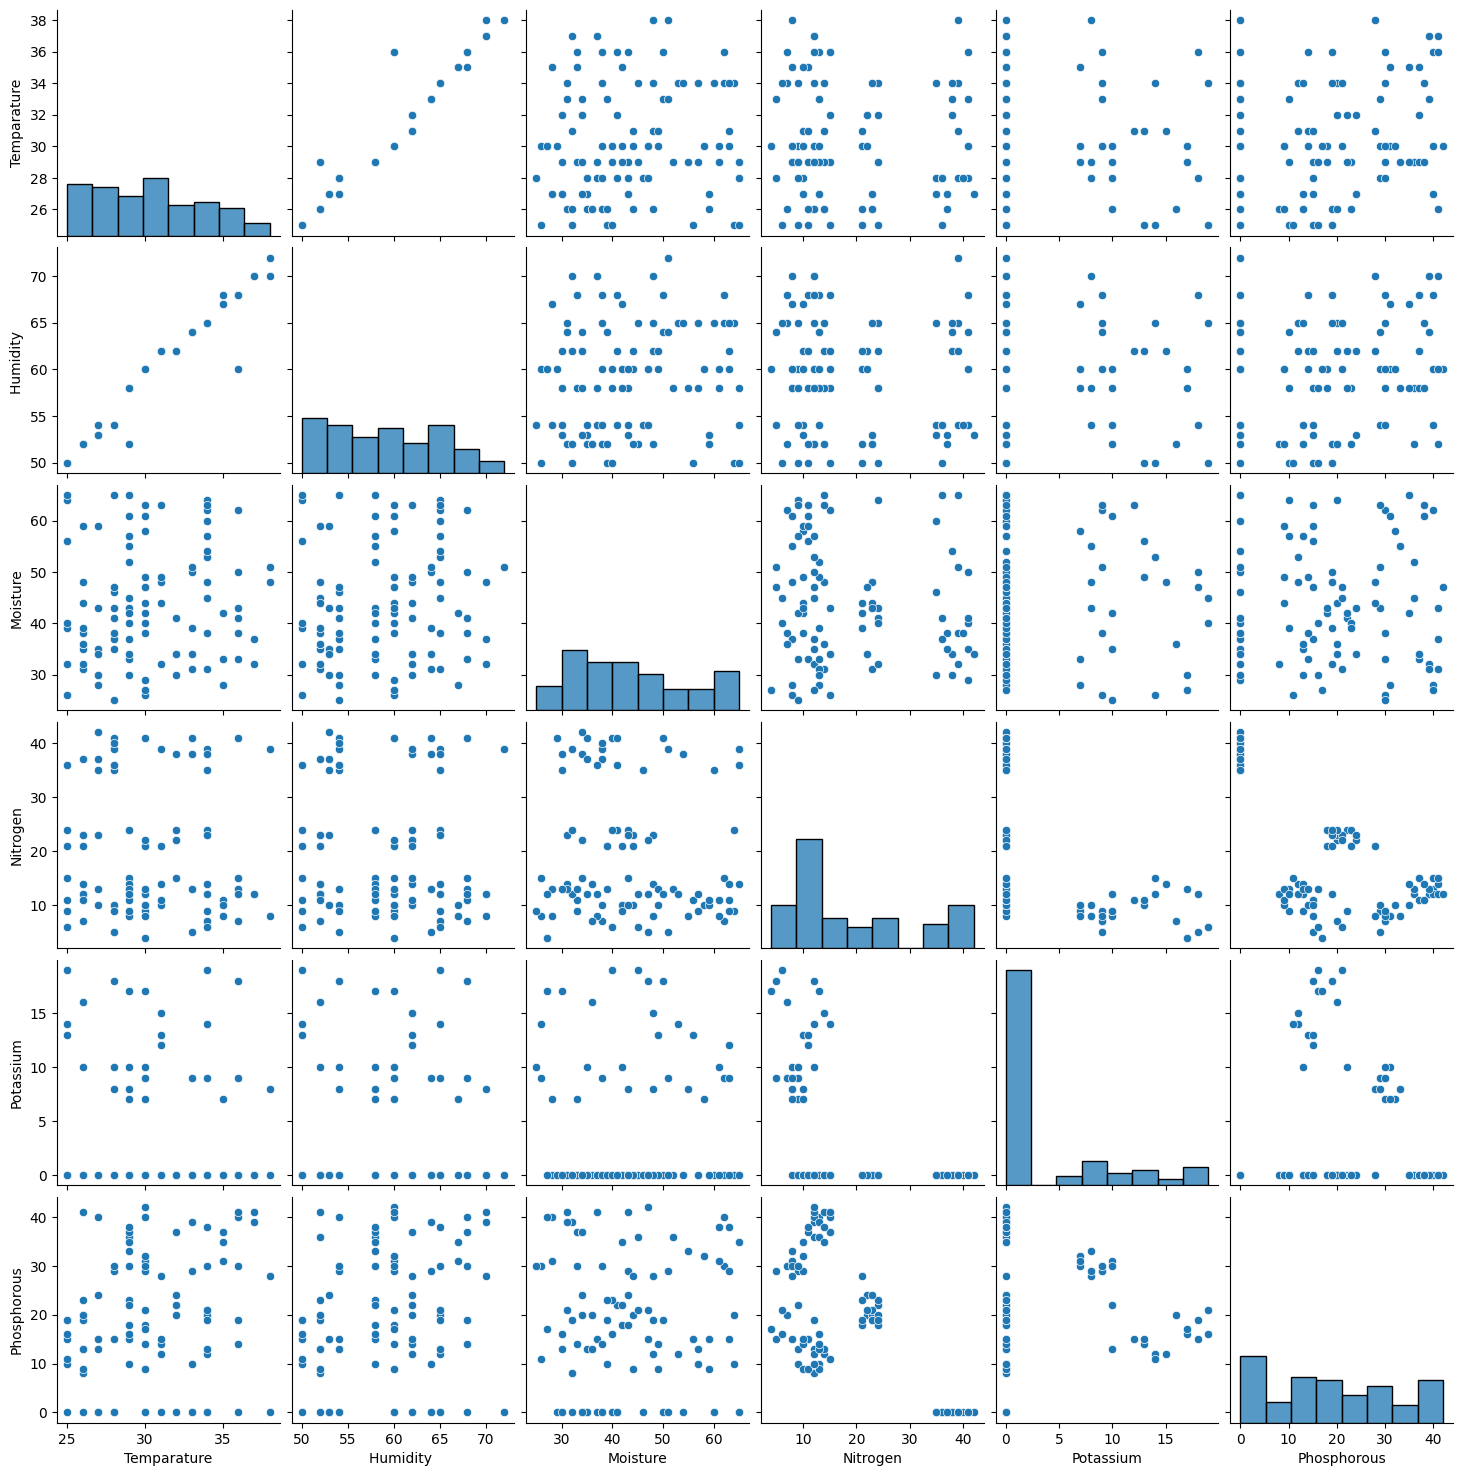

In [ ]:
sns.pairplot(df)

<Axes: >

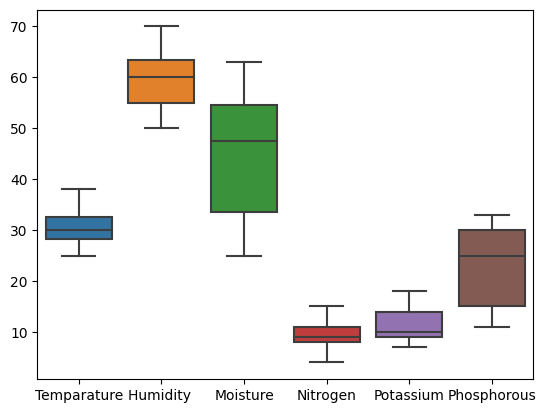

In [ ]:
#potassium has outliers
Q1 = df["Potassium"].quantile(0.25)
Q3 = df["Potassium"].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
df = df[df.Potassium[df.Potassium > min] & df.Potassium[df.Potassium < max]]
sns.boxplot(df)

In [ ]:
df['Soil Type'].value_counts()

Loamy     7
Sandy     6
Red       5
Black     4
Clayey    4
Name: Soil Type, dtype: int64

In [ ]:
df['Crop Type'].value_counts()

Sugarcane      5
Cotton         4
Barley         3
Maize          3
Oil seeds      2
Wheat          2
Paddy          2
Pulses         2
Tobacco        2
Ground Nuts    1
Name: Crop Type, dtype: int64

In [ ]:
df['Fertilizer Name'].value_counts()

14-35-14    14
17-17-17     7
10-26-26     5
Name: Fertilizer Name, dtype: int64

In [ ]:
Soil_Type = pd.get_dummies(df['Soil Type'], prefix='Soil Type')
df = pd.concat([df, Soil_Type], axis = 1)
df = df.drop('Soil Type', axis = 1)
df

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
2,34,65,62,Cotton,7,9,30,14-35-14,1,0,0,0,0
5,26,52,35,Barley,12,10,13,17-17-17,0,0,0,0,1
9,29,58,33,Oil seeds,9,7,30,14-35-14,1,0,0,0,0
11,31,62,48,Maize,14,15,12,17-17-17,0,0,0,0,1
15,31,62,49,Sugarcane,10,13,14,17-17-17,1,0,0,0,0
21,34,65,53,Sugarcane,12,14,12,17-17-17,0,0,1,0,0
26,30,60,63,Cotton,9,9,29,14-35-14,0,0,0,1,0
33,36,68,38,Barley,7,9,30,14-35-14,0,0,0,0,1
36,30,60,61,Cotton,8,10,31,14-35-14,0,0,1,0,0
38,25,50,26,Ground Nuts,15,14,11,17-17-17,0,0,0,1,0


In [ ]:
Crop_Type = pd.get_dummies(df['Crop Type'], prefix='Crop Type')
df = pd.concat([df, Crop_Type], axis = 1)
df = df.drop('Crop Type', axis = 1)
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
2,34,65,62,7,9,30,14-35-14,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,26,52,35,12,10,13,17-17-17,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,29,58,33,9,7,30,14-35-14,1,0,0,...,0,0,0,0,1,0,0,0,0,0
11,31,62,48,14,15,12,17-17-17,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,31,62,49,10,13,14,17-17-17,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21,34,65,53,12,14,12,17-17-17,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26,30,60,63,9,9,29,14-35-14,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33,36,68,38,7,9,30,14-35-14,0,0,0,...,1,0,0,0,0,0,0,0,0,0
36,30,60,61,8,10,31,14-35-14,0,0,1,...,0,1,0,0,0,0,0,0,0,0
38,25,50,26,15,14,11,17-17-17,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df['Fertilizer Name'].value_counts()

14-35-14    14
17-17-17     7
10-26-26     5
Name: Fertilizer Name, dtype: int64

In [ ]:
dic = {'14-35-14' : 0, '17-17-17' : 1, '10-26-26' : 2}
df['Fertilizer Name']=df['Fertilizer Name'].map(dic)
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
2,34,65,62,7,9,30,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,26,52,35,12,10,13,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,29,58,33,9,7,30,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
11,31,62,48,14,15,12,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,31,62,49,10,13,14,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21,34,65,53,12,14,12,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26,30,60,63,9,9,29,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33,36,68,38,7,9,30,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
36,30,60,61,8,10,31,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
38,25,50,26,15,14,11,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df1=df['Fertilizer Name']
df.drop('Fertilizer Name', axis = 1,inplace=True)
df["Feritilizer Name"] = df1
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Feritilizer Name
2,34,65,62,7,9,30,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,26,52,35,12,10,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,29,58,33,9,7,30,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11,31,62,48,14,15,12,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15,31,62,49,10,13,14,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
21,34,65,53,12,14,12,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
26,30,60,63,9,9,29,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
33,36,68,38,7,9,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,30,60,61,8,10,31,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
38,25,50,26,15,14,11,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 90 to 26
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Temparature            18 non-null     int64
 1   Humidity               18 non-null     int64
 2   Moisture               18 non-null     int64
 3   Nitrogen               18 non-null     int64
 4   Potassium              18 non-null     int64
 5   Phosphorous            18 non-null     int64
 6   Soil Type_Black        18 non-null     uint8
 7   Soil Type_Clayey       18 non-null     uint8
 8   Soil Type_Loamy        18 non-null     uint8
 9   Soil Type_Red          18 non-null     uint8
 10  Soil Type_Sandy        18 non-null     uint8
 11  Crop Type_Barley       18 non-null     uint8
 12  Crop Type_Cotton       18 non-null     uint8
 13  Crop Type_Ground Nuts  18 non-null     uint8
 14  Crop Type_Maize        18 non-null     uint8
 15  Crop Type_Oil seeds    18 non-null     ui

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
prediction = model1.predict(x_test)
print(accuracy_score(y_test, prediction))

0.875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [ ]:
import pickle
filename = 'LR_model.sav'
pickle.dump(model1, open(filename, 'wb'))

# some time later...
dic1=dic = {0: '14-35-14' ,1: '17-17-17',2: '10-26-26'}
# load the model from disk
loaded_model1 = pickle.load(open(filename, 'rb'))
arr1 = loaded_model1.predict([[50,15,37,8,9,15,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0]])
for i in arr1:
    print("Fertilizer name: ", dic1[i])
# load the model from disk


result = loaded_model1.score(x_test, y_test)
print(result)

Fertilizer name:  10-26-26
0.875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
filename = 'KNN_model.sav'
pickle.dump(knn, open(filename, 'wb'))

dic1=dic = {0: '14-35-14' ,1: '17-17-17',2: '10-26-26'}
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
arr = loaded_model.predict([[50,15,37,8,9,15,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0]])
for i in arr:
    print("Fertilizer name: ", dic1[i])
result = loaded_model.score(x_test, y_test)
print(result)

Fertilizer name:  10-26-26
0.75


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
